<a href="https://colab.research.google.com/github/RANJITHMUTHUSAMY005/TripFare-Prediction/blob/main/TRIPFARE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from scipy.stats import boxcox, skew
from sklearn.preprocessing import StandardScaler

In [7]:
import pandas as pd
df_taxi_fare=pd.read_csv('/content/drive/MyDrive/taxi_fare.csv')
df_taxi_fare.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_taxi_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [10]:
df_taxi_fare.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


In [11]:
df_taxi_fare.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


In [12]:
df_taxi_fare.duplicated().sum()

np.int64(0)

In [13]:
date_col=[i for i in df_taxi_fare.columns if 'date' in i.lower()]
df_taxi_fare[date_col]

,tpep_pickup_datetime,tpep_dropoff_datetime
0,2016-03-01 00:00:00,2016-03-01 00:07:55
1,2016-03-01 00:00:00,2016-03-01 00:11:06
2,2016-03-01 00:00:00,2016-03-01 00:31:06
3,2016-03-01 00:00:00,2016-03-01 00:00:00
4,2016-03-01 00:00:00,2016-03-01 00:00:00
...,...,...
212340,2016-03-01 12:15:37,2016-03-01 12:38:53
212341,2016-03-01 12:15:37,2016-03-01 12:38:22
212342,2016-03-01 12:15:37,2016-03-01 12:18:18
212343,2016-03-01 12:15:38,2016-03-01 12:22:47


converting object to datetime

In [14]:
for i in date_col:
    df_taxi_fare[i] = pd.to_datetime(df_taxi_fare[i])

In [15]:
df_taxi_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               212345 non-null  int64         
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns]
 3   passenger_count        212345 non-null  int64         
 4   pickup_longitude       212345 non-null  float64       
 5   pickup_latitude        212345 non-null  float64       
 6   RatecodeID             212345 non-null  int64         
 7   store_and_fwd_flag     212345 non-null  object        
 8   dropoff_longitude      212345 non-null  float64       
 9   dropoff_latitude       212345 non-null  float64       
 10  payment_type           212345 non-null  int64         
 11  fare_amount            212345 non-null  float64       
 12  extra                  212345 non-null  floa

In [16]:
df_taxi_fare['passenger_count'].unique()

array([1, 2, 3, 5, 6, 4, 0])

CONVERTING TIMEZONE FROM UTC TO US\EASTERN

In [17]:
df_taxi_fare['tpep_pickup_datetime'] = df_taxi_fare['tpep_pickup_datetime'].dt.tz_localize('UTC')  # assign UTC timezone
df_taxi_fare['tpep_pickup_datetime'] = df_taxi_fare['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')  # convert to EDT/EST

In [18]:
df_taxi_fare['tpep_dropoff_datetime']=df_taxi_fare['tpep_dropoff_datetime'].dt.tz_localize('UTC')
df_taxi_fare['tpep_dropoff_datetime']=df_taxi_fare['tpep_dropoff_datetime'].dt.tz_convert('US/Eastern')

In [19]:
# Haversine formula function
def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

# Calculate trip_distance (in kilometers)
df_taxi_fare['trip_distance'] = haversine(df_taxi_fare['pickup_longitude'], df_taxi_fare['pickup_latitude'],
                                df_taxi_fare['dropoff_longitude'], df_taxi_fare['dropoff_latitude'])

In [20]:
# Extract pickup_day: weekday or weekend
df_taxi_fare['pickup_day'] = df_taxi_fare['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'weekday')

In [21]:
# Extract am/pm
df_taxi_fare['am_pm'] = df_taxi_fare['tpep_pickup_datetime'].dt.strftime('%p').str.lower()

In [22]:
# Define night hours (e.g., from 8 PM to 5 AM)
def is_night(dt):
    hour = dt.hour
    return 1 if (hour >= 20 or hour < 5) else 0

df_taxi_fare['is_night'] = df_taxi_fare['tpep_pickup_datetime'].apply(is_night)

In [23]:
# Calculate trip duration in minutes

df_taxi_fare['trip_duration'] = (df_taxi_fare['tpep_dropoff_datetime'] - df_taxi_fare['tpep_pickup_datetime']).dt.total_seconds() / 60

In [24]:
df_taxi_fare.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,pickup_day,am_pm,is_night,trip_duration
0,1,2016-02-29 19:00:00-05:00,2016-02-29 19:07:55-05:00,1,-73.976746,40.765152,1,N,-74.004265,40.746128,...,0.5,2.05,0.00,0.3,12.35,3.138096,weekday,pm,0,7.916667
1,1,2016-02-29 19:00:00-05:00,2016-02-29 19:11:06-05:00,1,-73.983482,40.767925,1,N,-74.005943,40.733166,...,0.5,3.05,0.00,0.3,15.35,4.303331,weekday,pm,0,11.100000
2,2,2016-02-29 19:00:00-05:00,2016-02-29 19:31:06-05:00,2,-73.782021,40.644810,1,N,-73.974541,40.675770,...,0.5,8.00,0.00,0.3,63.80,16.600142,weekday,pm,0,31.100000
3,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,...,0.5,3.78,5.54,0.3,41.62,9.046547,weekday,pm,0,0.000000
4,2,2016-02-29 19:00:00-05:00,2016-02-29 19:00:00-05:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,...,0.0,0.00,15.50,0.3,113.80,20.400022,weekday,pm,0,0.000000


**Exploratory Data Analysis**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

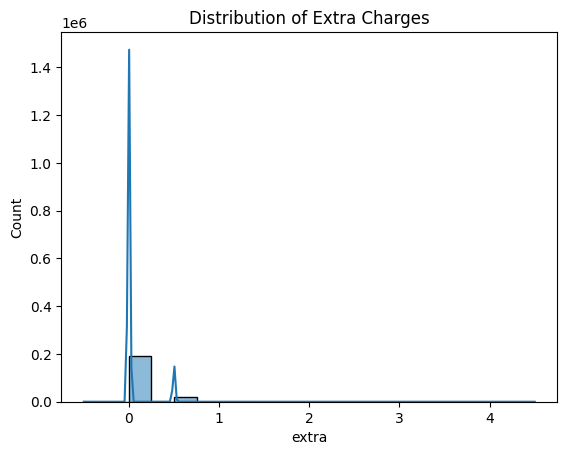

In [26]:
#  Distribution of extra charges
sns.histplot(df_taxi_fare['extra'], bins=20, kde=True)
plt.title('Distribution of Extra Charges')
plt.show()

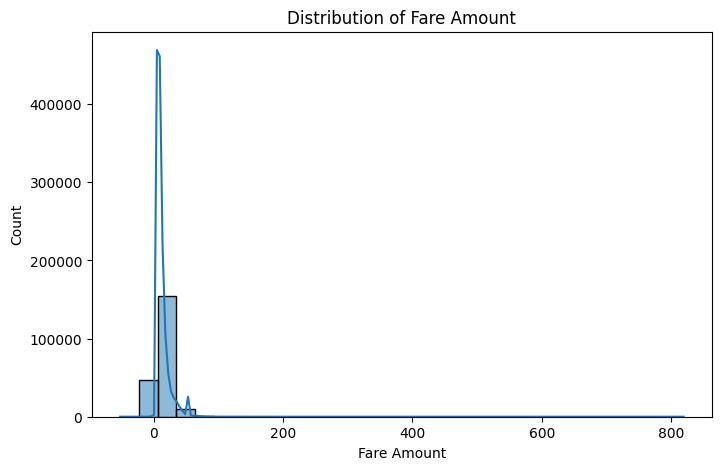

In [27]:
# Histogram of fare_amount
plt.figure(figsize=(8, 5))
sns.histplot(df_taxi_fare['fare_amount'], bins=30, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

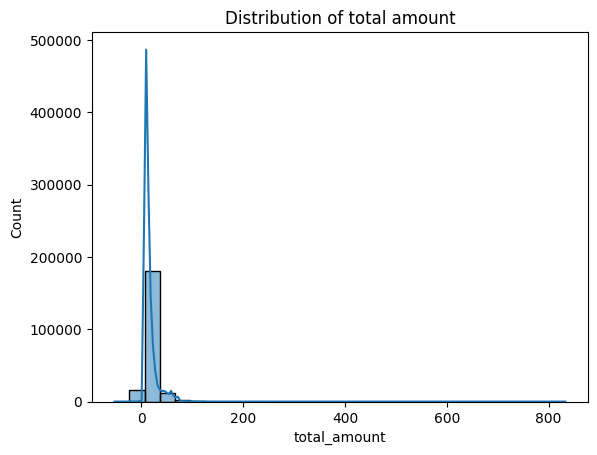

In [28]:
#  Distribution of total amount
sns.histplot(df_taxi_fare['total_amount'], bins=30, kde=True) # bins specifies how many bins (or intervals) the histogram should divide the data into
plt.title('Distribution of total amount')
plt.show()

**Fare vs Distance**

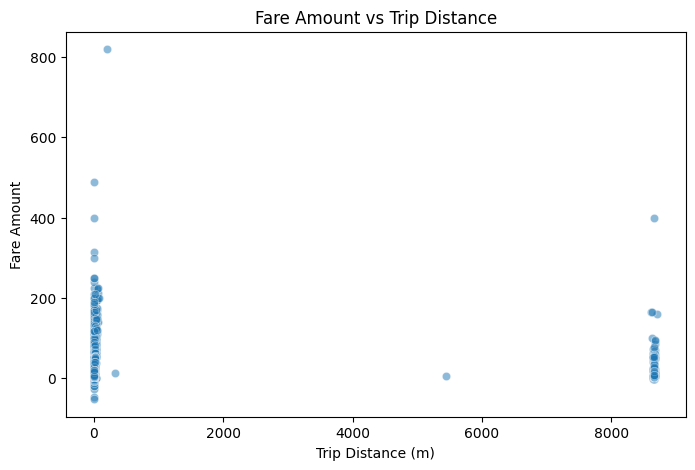

In [29]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_taxi_fare, alpha=0.5)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (m)')
plt.ylabel('Fare Amount')
plt.show()

/tmp/ipython-input-3422158886.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_fare_per_bin = df_taxi_fare.groupby('distance_bin')['fare_amount'].mean().reset_index()


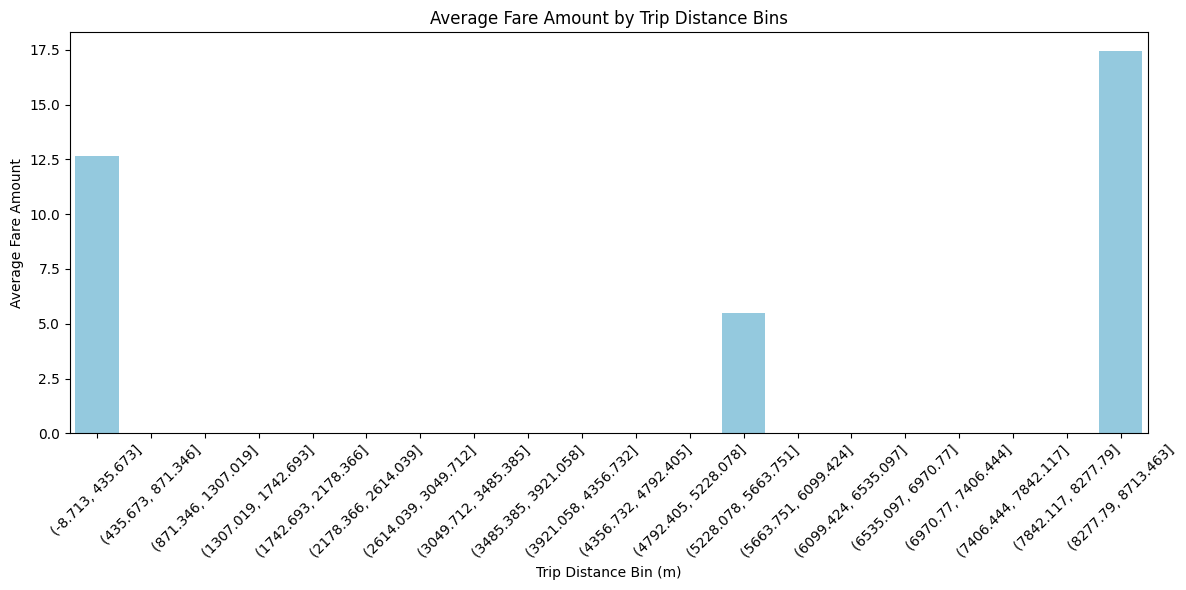

In [30]:
# Create bins for trip_distance
df_taxi_fare['distance_bin'] = pd.cut(df_taxi_fare['trip_distance'], bins=20)  # 20 bins for better granularity

# Aggregate: calculate average fare_amount for each distance bin
avg_fare_per_bin = df_taxi_fare.groupby('distance_bin')['fare_amount'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='distance_bin', y='fare_amount', data=avg_fare_per_bin, color='skyblue')

plt.xticks(rotation=45)
plt.title('Average Fare Amount by Trip Distance Bins')
plt.xlabel('Trip Distance Bin (m)')
plt.ylabel('Average Fare Amount')

plt.tight_layout()
plt.show()

**Fare vs Passenger Count**

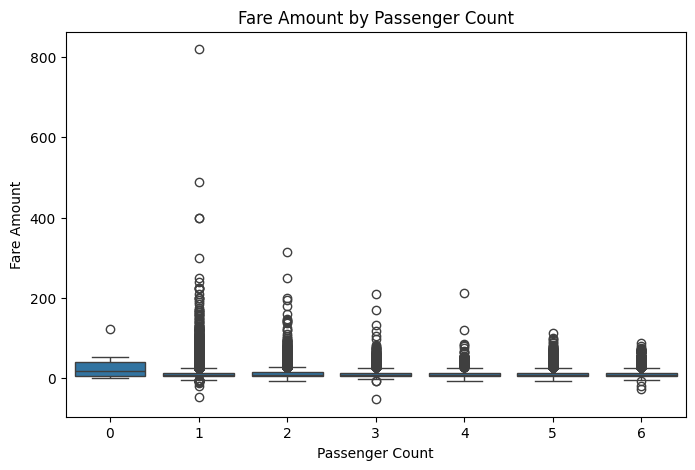

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df_taxi_fare)
plt.title('Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()

/tmp/ipython-input-2415494237.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='passenger_count', y='fare_amount', data=df_taxi_fare, ci=None, color='skyblue')


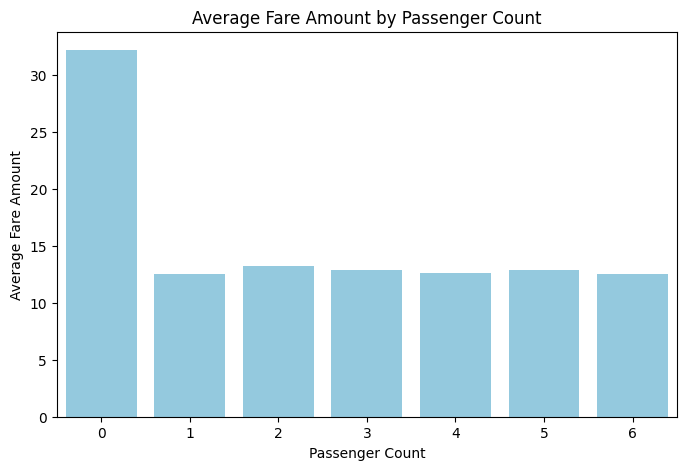

In [32]:
plt.figure(figsize=(8,5))

# Barplot of average fare_amount grouped by passenger_count
sns.barplot(x='passenger_count', y='fare_amount', data=df_taxi_fare, ci=None, color='skyblue')

plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.show()

**Fare variations across time of day, weekdays vs weekends, and months**

In [33]:
# Extract hour and month
df_taxi_fare['pickup_hour'] = df_taxi_fare['tpep_pickup_datetime'].dt.hour
df_taxi_fare['pickup_month'] = df_taxi_fare['tpep_pickup_datetime'].dt.month

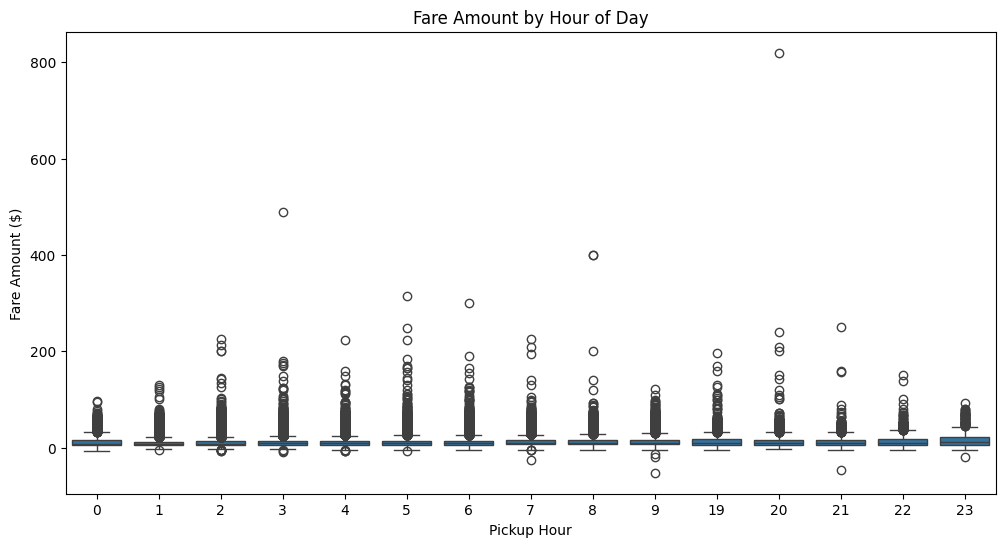

In [34]:
# Fare by hour of day (boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(x='pickup_hour', y='fare_amount', data=df_taxi_fare)
plt.title('Fare Amount by Hour of Day')
plt.xlabel('Pickup Hour')
plt.ylabel('Fare Amount ($)')
plt.show()

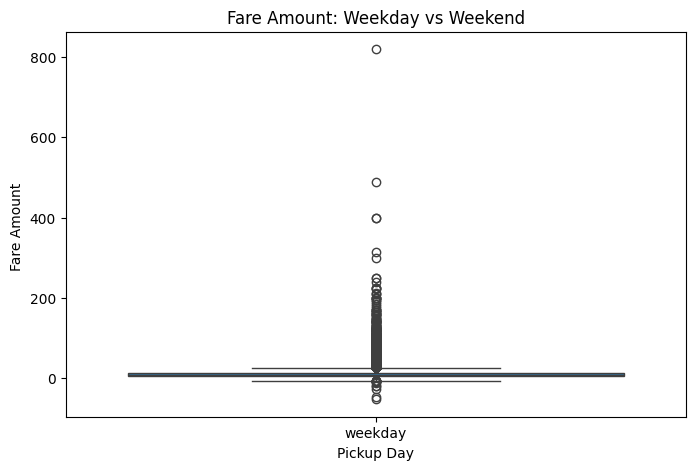

In [35]:
# Fare by weekday vs weekend (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='pickup_day', y='fare_amount', data=df_taxi_fare)
plt.title('Fare Amount: Weekday vs Weekend')
plt.xlabel('Pickup Day')
plt.ylabel('Fare Amount ')
plt.show()

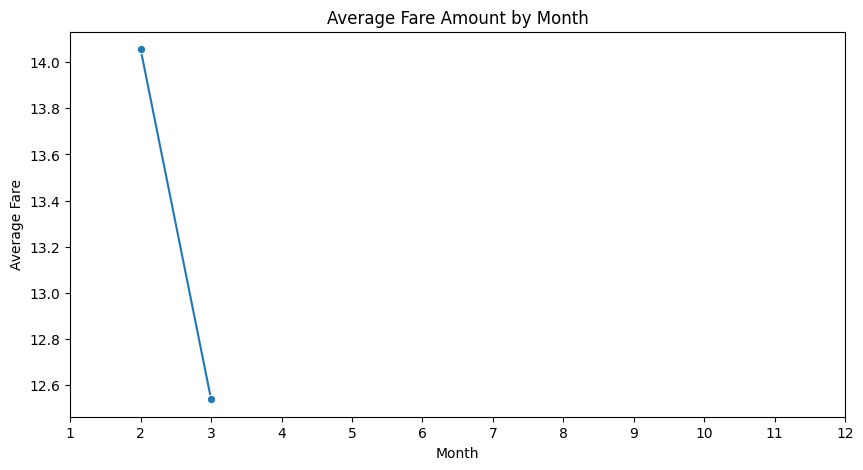

In [36]:
# Average fare by month (line plot)
avg_fare_by_month = df_taxi_fare.groupby('pickup_month')['fare_amount'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_fare_by_month, x='pickup_month', y='fare_amount', marker='o')
plt.title('Average Fare Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.xticks(range(1,13))
plt.show()

**Distribution of trip distances, trip durations, and pickup hours**

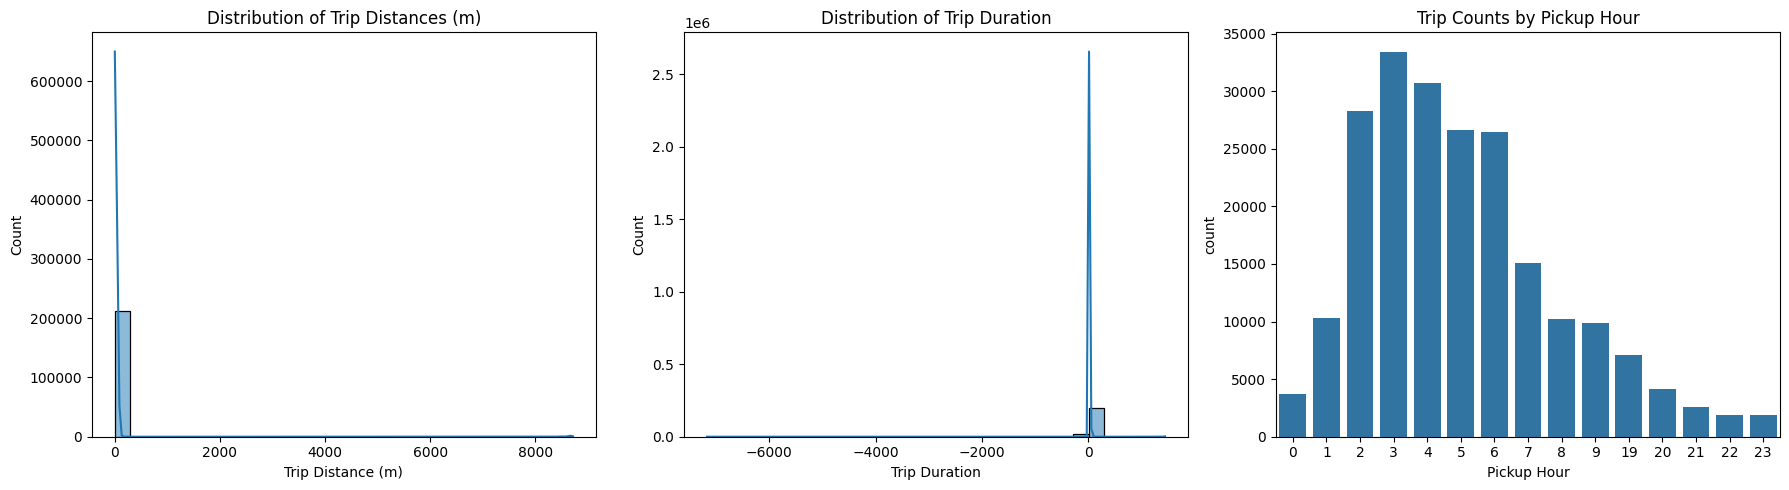

In [37]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.histplot(df_taxi_fare['trip_distance'], bins=30, kde=True)
plt.title('Distribution of Trip Distances (m)')
plt.xlabel('Trip Distance (m)')

plt.subplot(1,3,2)
sns.histplot(df_taxi_fare['trip_duration'], bins=30, kde=True)
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration')

plt.subplot(1,3,3)
sns.countplot(x='pickup_hour', data=df_taxi_fare)
plt.title('Trip Counts by Pickup Hour')
plt.xlabel('Pickup Hour')

plt.tight_layout()
plt.show()

**Fare per mile and fare per minute across time periods or trip lengths**

In [38]:
# First, compute fare per mile and fare per minute
df_taxi_fare['fare_per_mile'] = df_taxi_fare['fare_amount'] / df_taxi_fare['trip_distance'].replace(0, np.nan)
df_taxi_fare['fare_per_minute'] = df_taxi_fare['fare_amount'] / df_taxi_fare['trip_duration'].replace(0, np.nan)

**Fare per mile by pickup hour**

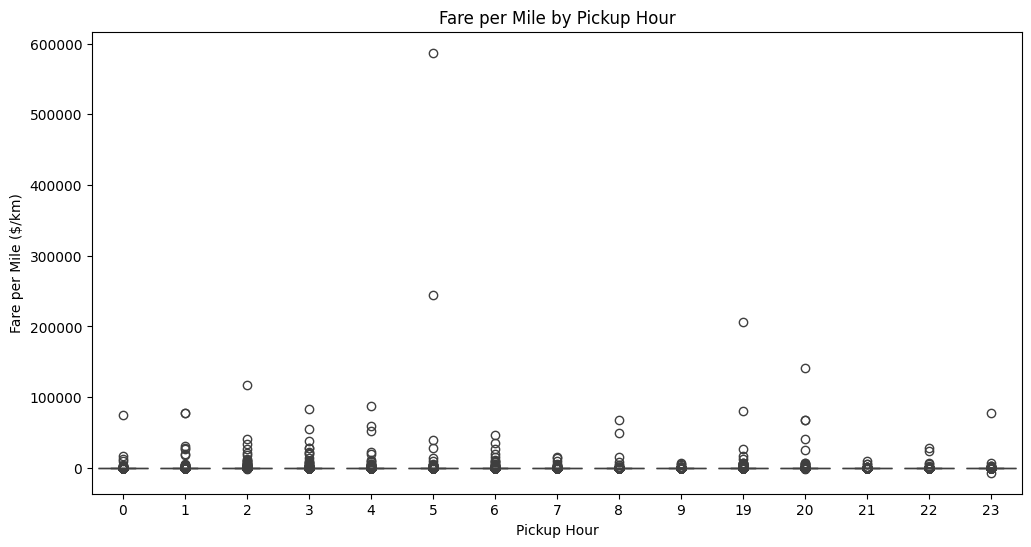

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='pickup_hour', y='fare_per_mile', data=df_taxi_fare)
plt.title('Fare per Mile by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Fare per Mile ($/km)')
plt.show()

**Fare per minute by trip distance**

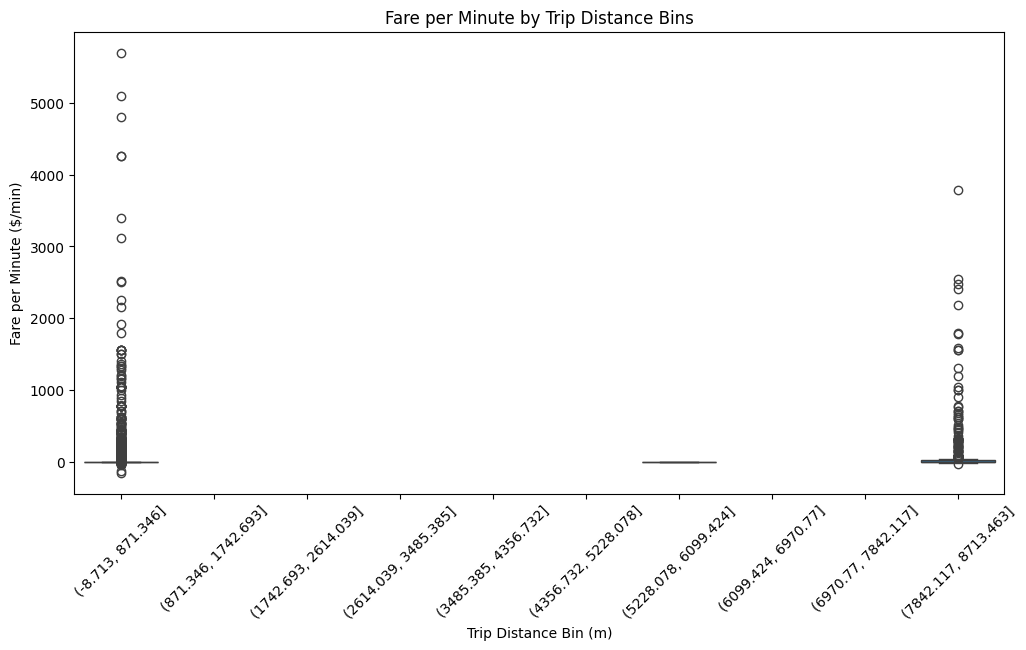

In [40]:
#pd.cut() divides the continuous variable trip_distance into 10 equal-width bins (intervals).
#This creates a new categorical column distance_bin in the DataFrame.
df_taxi_fare['distance_bin'] = pd.cut(df_taxi_fare['trip_distance'], bins=10)
plt.figure(figsize=(12,6))
sns.boxplot(x='distance_bin', y='fare_per_minute', data=df_taxi_fare)
plt.xticks(rotation=45)
plt.title('Fare per Minute by Trip Distance Bins')
plt.xlabel('Trip Distance Bin (m)')
plt.ylabel('Fare per Minute ($/min)')
plt.show()

**Trip counts by pickup hour and pickup day**

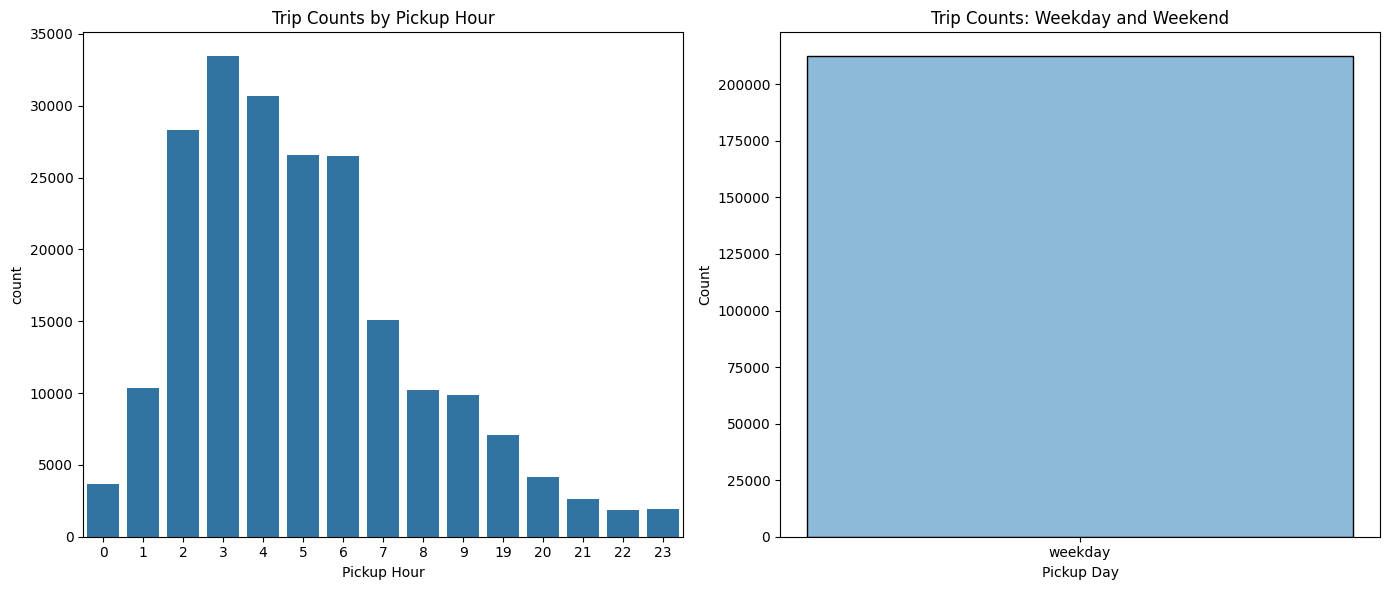

In [41]:
plt.figure(figsize=(14,6))

# Trips by hour
plt.subplot(1,2,1)
sns.countplot(x='pickup_hour', data=df_taxi_fare)
plt.title('Trip Counts by Pickup Hour')
plt.xlabel('Pickup Hour')

# Trips by day (weekday/weekend)
plt.subplot(1,2,2)
sns.histplot(df_taxi_fare['pickup_day'], kde=True)
plt.title('Trip Counts: Weekday and Weekend')
plt.xlabel('Pickup Day')

plt.tight_layout()
plt.show()

**Impact of night rides and weekend trips on fare amounts**

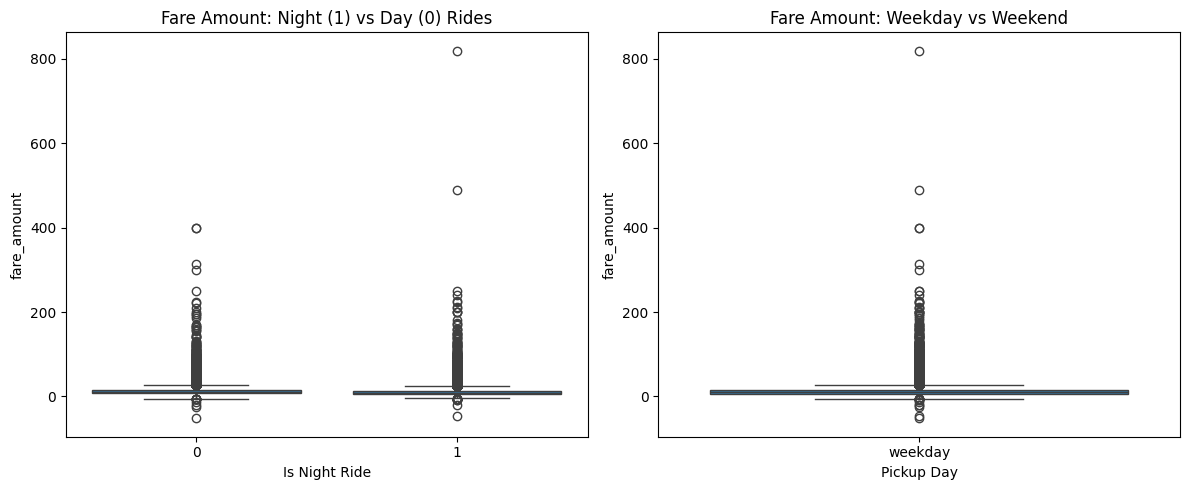

In [42]:
plt.figure(figsize=(12,5))

# Fare by night rides
plt.subplot(1,2,1)
sns.boxplot(x='is_night', y='fare_amount', data=df_taxi_fare)
plt.title('Fare Amount: Night (1) vs Day (0) Rides')
plt.xlabel('Is Night Ride')

# Fare by pickup day (weekday/weekend)
plt.subplot(1,2,2)
sns.boxplot(x='pickup_day', y='fare_amount', data=df_taxi_fare)
plt.title('Fare Amount: Weekday vs Weekend')
plt.xlabel('Pickup Day')

plt.tight_layout()
plt.show()

**Summary statistics for these groups**

In [43]:
print("Fare amount by night/day:")
print(df_taxi_fare.groupby('is_night')['fare_amount'].describe())

print("\nFare amount by weekday/weekend:")
print(df_taxi_fare.groupby('pickup_day')['fare_amount'].describe())

Fare amount by night/day:
             count       mean        std   min  25%   50%   75%    max
is_night                                                              
0          95353.0  13.173318  11.120301 -52.0  7.0  10.0  15.0  400.0
1         116992.0  12.251769  10.654145 -47.0  6.5   9.0  14.0  819.5

Fare amount by weekday/weekend:
               count       mean        std   min  25%  50%   75%    max
pickup_day                                                             
weekday     212345.0  12.665588  10.875584 -52.0  6.5  9.5  14.5  819.5


In [44]:
numerical_cols= df_taxi_fare.select_dtypes(include=['float64', 'int64']).columns
numerical_cols

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance', 'is_night',
       'trip_duration', 'fare_per_mile', 'fare_per_minute'],
      dtype='object')

**Correlation**

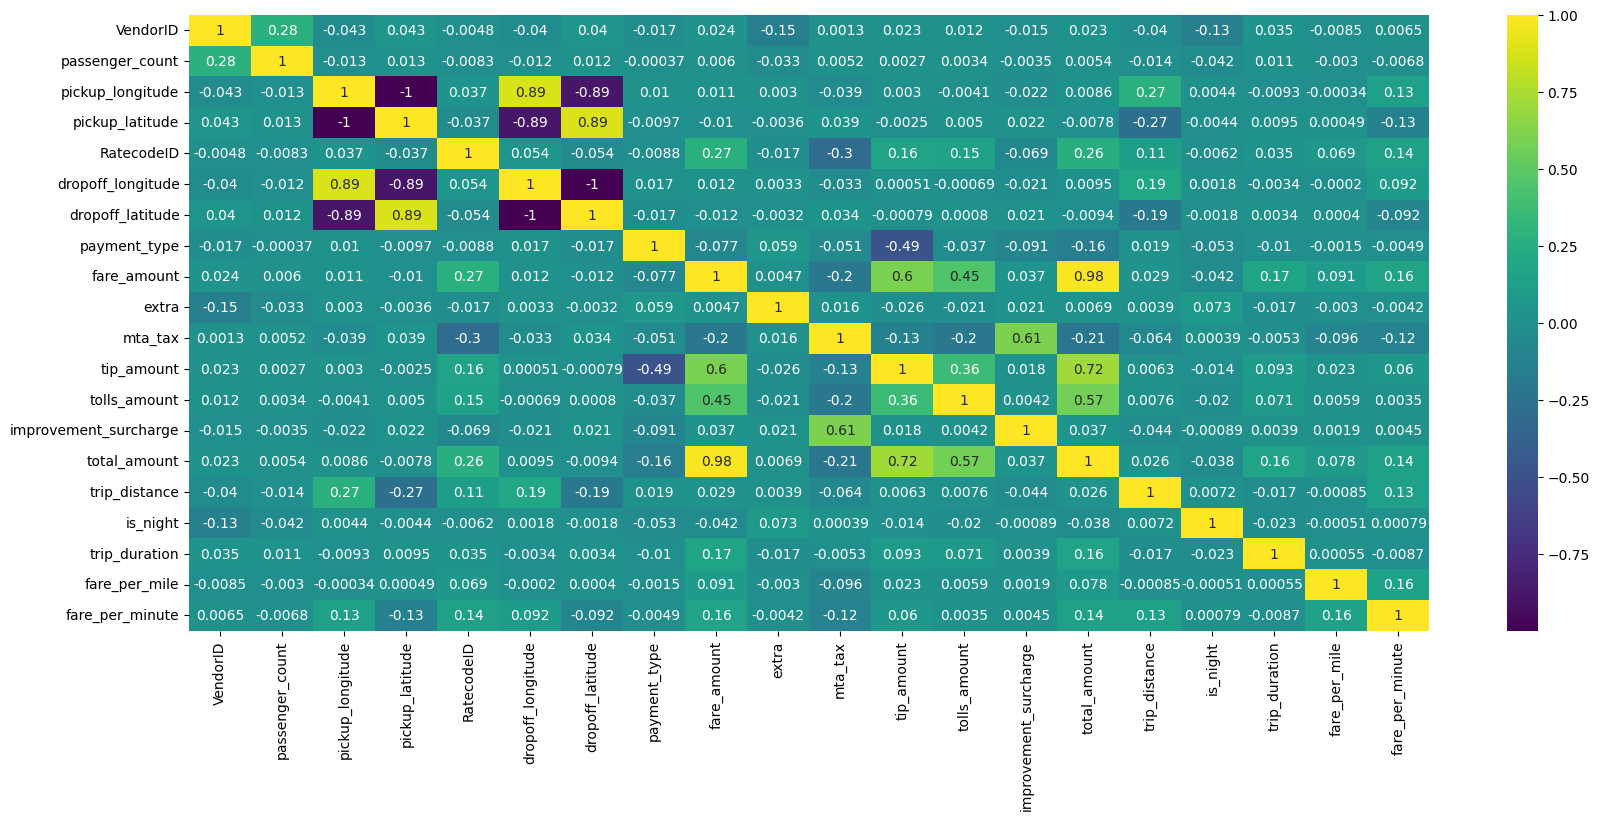

In [45]:
corr=df_taxi_fare[numerical_cols].corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

In [46]:
corr

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance,is_night,trip_duration,fare_per_mile,fare_per_minute
VendorID,1.000000,0.277572,-0.042623,0.042664,-0.004814,-0.039628,0.039537,-0.016623,0.023872,-0.146590,0.001298,0.022589,0.012008,-0.015428,0.023449,-0.040329,-0.133894,0.035267,-0.008536,0.006497
passenger_count,0.277572,1.000000,-0.013427,0.013450,-0.008276,-0.011958,0.011919,-0.000369,0.005970,-0.032630,0.005184,0.002656,0.003396,-0.003479,0.005430,-0.014362,-0.042079,0.010881,-0.003014,-0.006831
pickup_longitude,-0.042623,-0.013427,1.000000,-0.999472,0.037302,0.887973,-0.887578,0.009952,0.010948,0.002951,-0.038987,0.003021,-0.004113,-0.021542,0.008604,0.267604,0.004385,-0.009330,-0.000340,0.126969
pickup_latitude,0.042664,0.013450,-0.999472,1.000000,-0.037322,-0.887719,0.888033,-0.009711,-0.010219,-0.003564,0.039008,-0.002514,0.004969,0.021518,-0.007806,-0.267189,-0.004364,0.009474,0.000492,-0.126975
RatecodeID,-0.004814,-0.008276,0.037302,-0.037322,1.000000,0.054062,-0.054275,-0.008808,0.266776,-0.016979,-0.301218,0.159901,0.154504,-0.068736,0.264924,0.107365,-0.006172,0.035219,0.069207,0.144229
dropoff_longitude,-0.039628,-0.011958,0.887973,-0.887719,0.054062,1.000000,-0.999614,0.017301,0.011934,0.003334,-0.032707,0.000511,-0.000690,-0.021086,0.009462,0.193901,0.001817,-0.003426,-0.000204,0.091938
dropoff_latitude,0.039537,0.011919,-0.887578,0.888033,-0.054275,-0.999614,1.000000,-0.016784,-0.011865,-0.003198,0.033675,-0.000788,0.000805,0.021048,-0.009437,-0.193924,-0.001773,0.003356,0.000395,-0.091941
payment_type,-0.016623,-0.000369,0.009952,-0.009711,-0.008808,0.017301,-0.016784,1.000000,-0.077147,0.058785,-0.050546,-0.490224,-0.036838,-0.091486,-0.157255,0.019393,-0.053149,-0.010377,-0.001462,-0.004876
fare_amount,0.023872,0.005970,0.010948,-0.010219,0.266776,0.011934,-0.011865,-0.077147,1.000000,0.004653,-0.200802,0.601308,0.449035,0.037361,0.977607,0.029481,-0.042147,0.165525,0.091428,0.161862
extra,-0.146590,-0.032630,0.002951,-0.003564,-0.016979,0.003334,-0.003198,0.058785,0.004653,1.000000,0.015604,-0.025568,-0.020560,0.021222,0.006900,0.003920,0.072899,-0.016827,-0.002959,-0.004154


# By going through the correlations we can find that total amount higly correlates with fare amount, and are dependent on  
# extra, mta_tax,tip_amount and tolls_amount that are highly correlated with each other also.
# Similarly store_and_fwd_flag is not making any major difference in the data.
# Pick up  and drop off latitudes and longitudes are negatively correlated with each other .
# Similarly trip duration is calculated from 'tpep_pickup_datetime'and 'tpep_dropoff_datetime'
# So these columns can be dropped inorder to get a better model.

In [47]:
# List of columns to drop
cols_to_drop = [
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'fare_amount',      # avoid leakage since total_amount includes fare
    'tip_amount',       # part of total_amount
    'extra',            # part of total_amount
    'mta_tax',          # part of total_amount
    'tolls_amount',     # part of total_amount
    'improvement_surcharge',  # part of total_amount
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime'
]

# Drop these columns from your dataframe (assuming it's called df)
data = df_taxi_fare.drop(columns=cols_to_drop)

In [48]:
data = data.drop('store_and_fwd_flag',axis=1)

In [49]:
numerical_cols= data.select_dtypes(include=['float64', 'int64']).columns

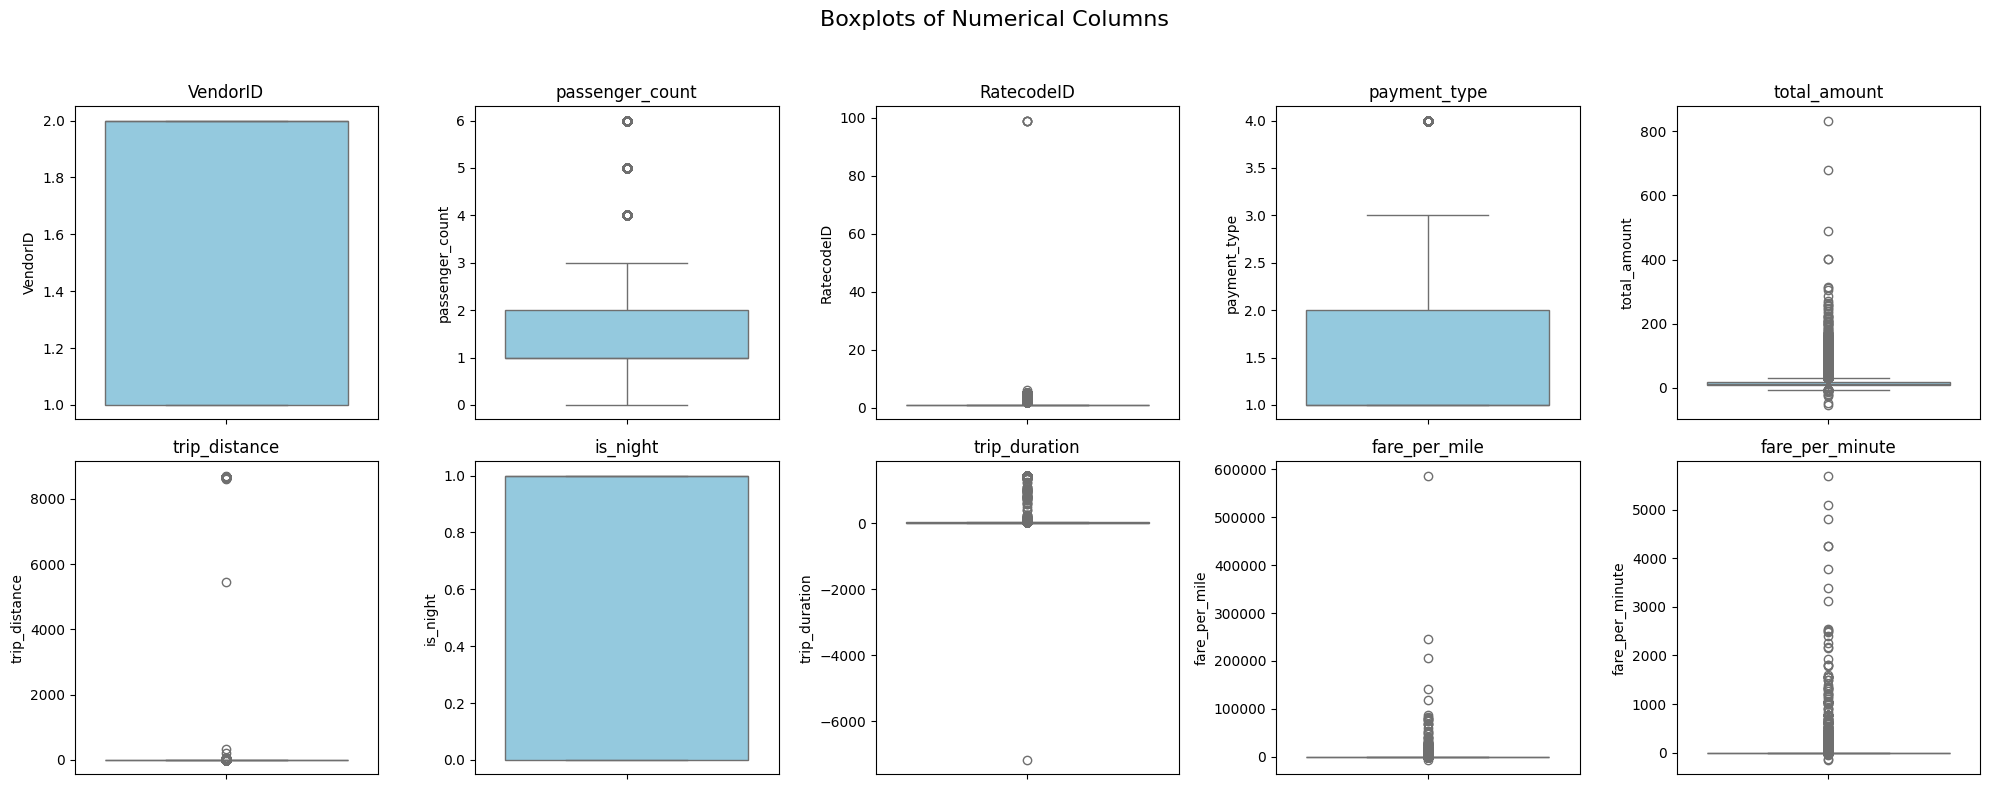

In [50]:
num_plots = len(numerical_cols)
plots_per_row = 5
num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # ceiling division

plt.figure(figsize=(plots_per_row * 4, num_rows * 4))
plt.suptitle('Boxplots of Numerical Columns', fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, plots_per_row, i+1)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout so main title isn't overlapped

plt.show()

In [51]:
from scipy import stats
z_scores = np.abs(stats.zscore(data[numerical_cols]))
# Keep rows where all z-scores < 3
clean_data = data[(z_scores < 3).all(axis=1)]

In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [53]:
ohe_cols=['RatecodeID',
    'payment_type']

In [54]:
# Initialize OneHotEncoder
# handle_unknown='ignore' will set new/unseen categories to all zeros
# sparse_output=False ensures a dense array is returned, which is easier to work with pandas
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [55]:
# Fit and transform the selected columns
encoded_features = ohe.fit_transform(df_taxi_fare[ohe_cols])

In [63]:
# Create a DataFrame from the encoded features with appropriate column names
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(ohe_cols))

In [56]:
# --- Encoding Binary Column ---

# Column to apply Binary Encoding (LabelEncoder or manual mapping)
binary_col = ['pickup_day',
              'am_pm']

In [57]:
# Using LabelEncoder for binary column
label_encoder = LabelEncoder()

for col in binary_col:
    data[col] = label_encoder.fit_transform(data[col])

In [58]:
print(f"\nMapping for '{binary_col}': {list(label_encoder.classes_)} -> {list(range(len(label_encoder.classes_)))}")


Mapping for '['pickup_day', 'am_pm']': ['am', 'pm'] -> [0, 1]


In [60]:
# --- Combine all features ---

# Define all columns that were involved in encoding (to be dropped from original df)
columns_to_drop_from_original = ohe_cols

In [61]:
# Drop original categorical and binary columns from the main DataFrame
# Keep other numerical columns and the target column
df_processed = data.drop(columns=columns_to_drop_from_original)

In [64]:
# Concatenate the processed numerical columns
# and the newly encoded features
data = pd.concat([df_processed, encoded_df], axis=1)

In [65]:
data.columns

Index(['VendorID', 'passenger_count', 'total_amount', 'trip_distance',
       'pickup_day', 'am_pm', 'is_night', 'trip_duration', 'distance_bin',
       'pickup_hour', 'pickup_month', 'fare_per_mile', 'fare_per_minute',
       'RatecodeID_1', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4',
       'RatecodeID_5', 'RatecodeID_6', 'RatecodeID_99', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4'],
      dtype='object')

In [66]:
data.head()

,VendorID,passenger_count,total_amount,trip_distance,pickup_day,am_pm,is_night,trip_duration,distance_bin,pickup_hour,...,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,1,1,12.35,3.138096,0,1,0,7.916667,"(-8.713, 871.346]",19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,15.35,4.303331,0,1,0,11.100000,"(-8.713, 871.346]",19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2,63.80,16.600142,0,1,0,31.100000,"(-8.713, 871.346]",19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,3,41.62,9.046547,0,1,0,0.000000,"(-8.713, 871.346]",19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,5,113.80,20.400022,0,1,0,0.000000,"(-8.713, 871.346]",19,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   VendorID         212345 non-null  int64   
 1   passenger_count  212345 non-null  int64   
 2   total_amount     212345 non-null  float64 
 3   trip_distance    212345 non-null  float64 
 4   pickup_day       212345 non-null  int64   
 5   am_pm            212345 non-null  int64   
 6   is_night         212345 non-null  int64   
 7   trip_duration    212345 non-null  float64 
 8   distance_bin     212345 non-null  category
 9   pickup_hour      212345 non-null  int32   
 10  pickup_month     212345 non-null  int32   
 11  fare_per_mile    209363 non-null  float64 
 12  fare_per_minute  212215 non-null  float64 
 13  RatecodeID_1     212345 non-null  float64 
 14  RatecodeID_2     212345 non-null  float64 
 15  RatecodeID_3     212345 non-null  float64 
 16  RatecodeID_4     212

In [68]:
data.drop('distance_bin',axis=1, inplace=True)

In [69]:
data.head()

,VendorID,passenger_count,total_amount,trip_distance,pickup_day,am_pm,is_night,trip_duration,pickup_hour,pickup_month,...,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,RatecodeID_99,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,1,1,12.35,3.138096,0,1,0,7.916667,19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,15.35,4.303331,0,1,0,11.100000,19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2,63.80,16.600142,0,1,0,31.100000,19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2,3,41.62,9.046547,0,1,0,0.000000,19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,5,113.80,20.400022,0,1,0,0.000000,19,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


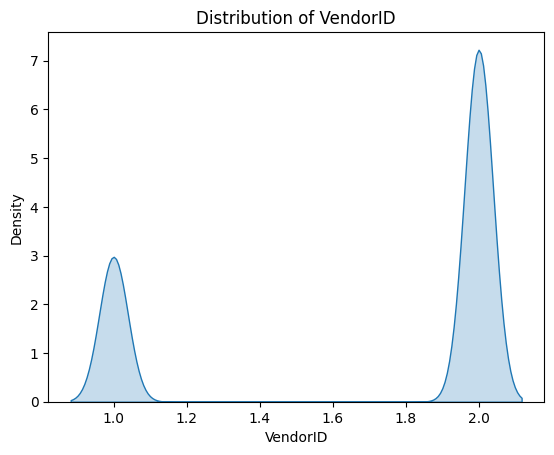

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


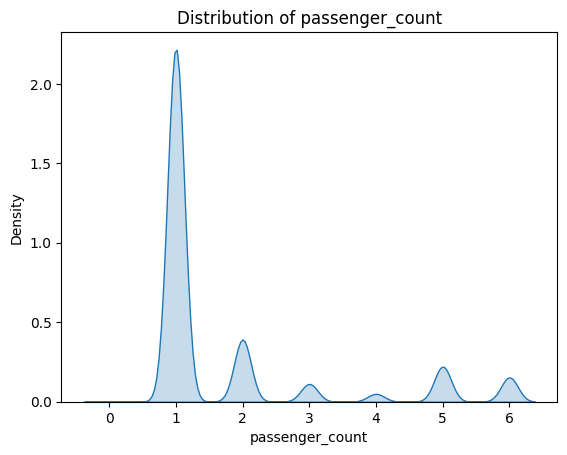

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


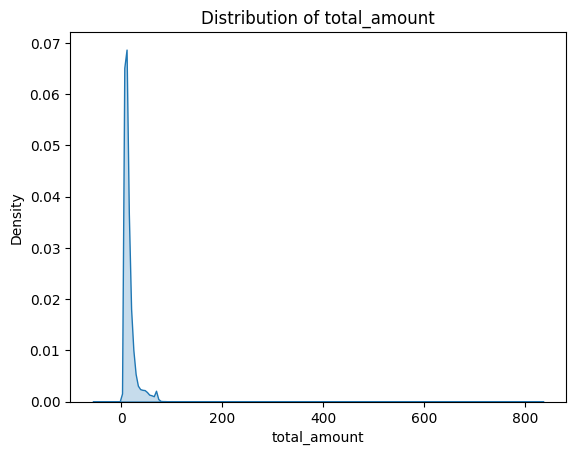

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


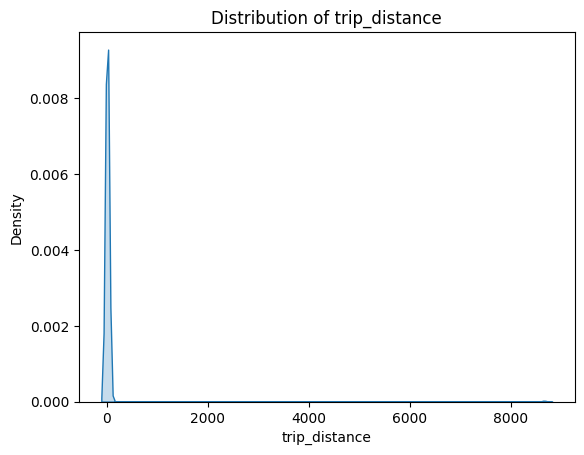

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)
/tmp/ipython-input-3049188080.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], shade=True)


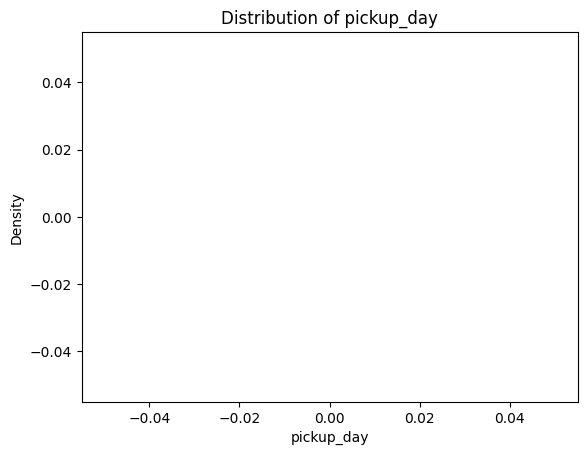

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


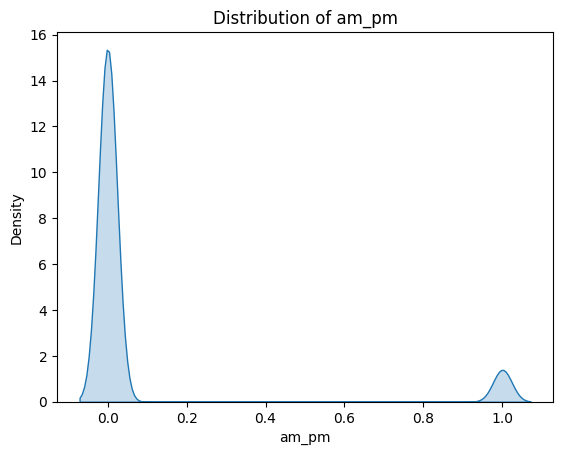

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


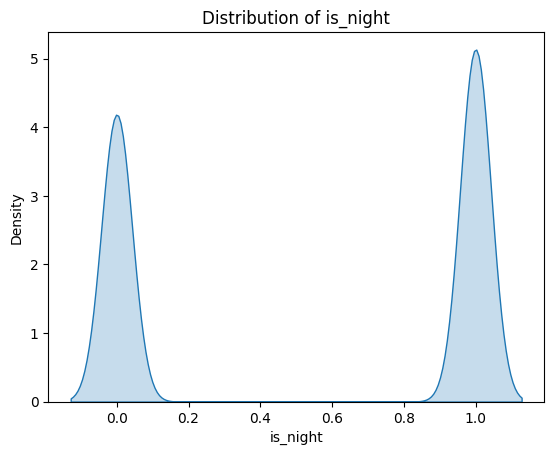

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


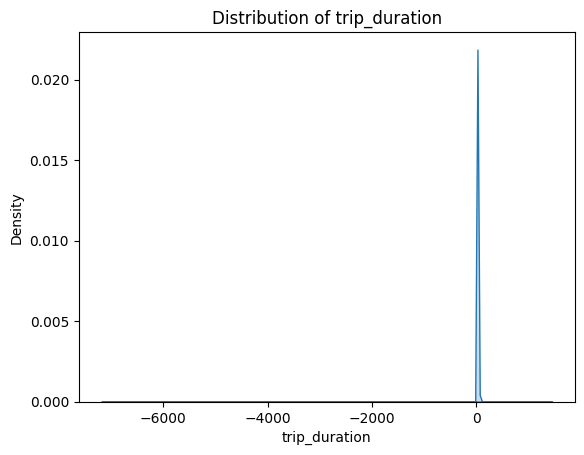

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


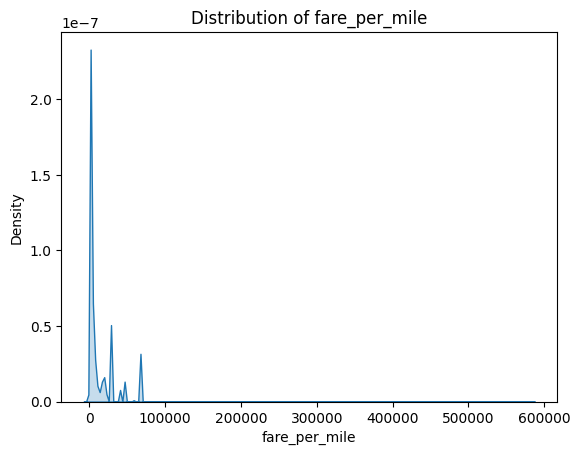

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


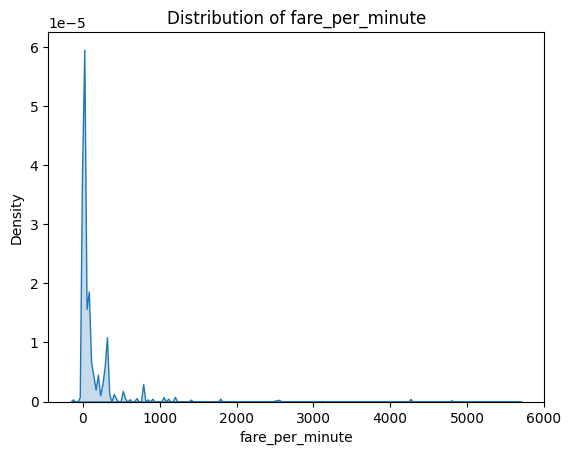

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


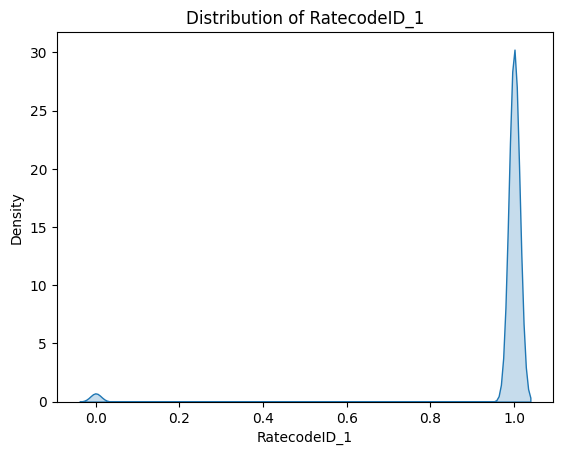

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


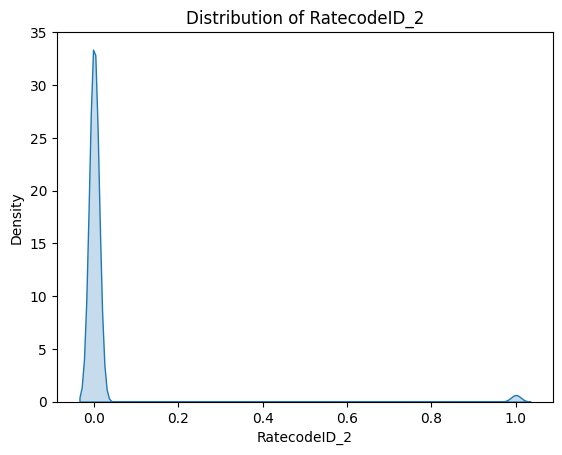

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


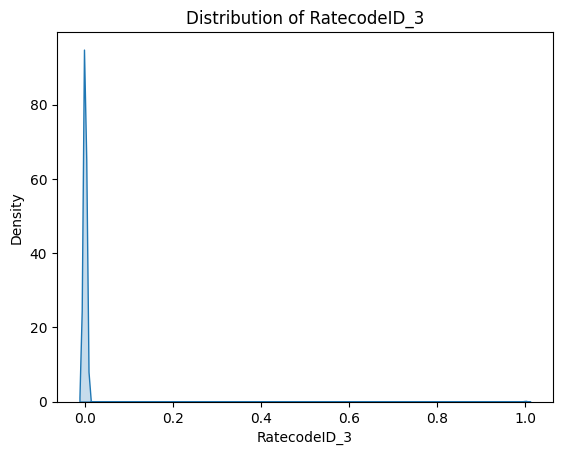

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


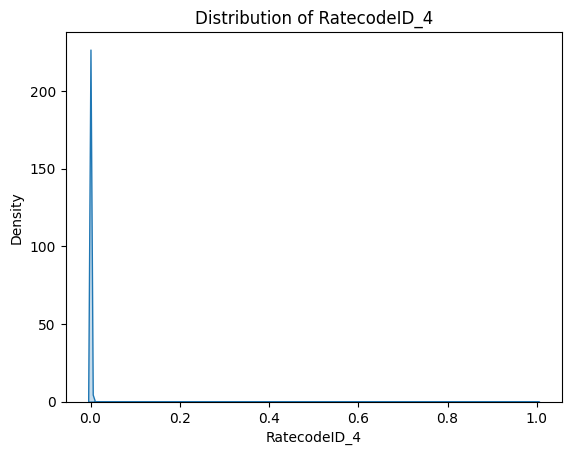

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


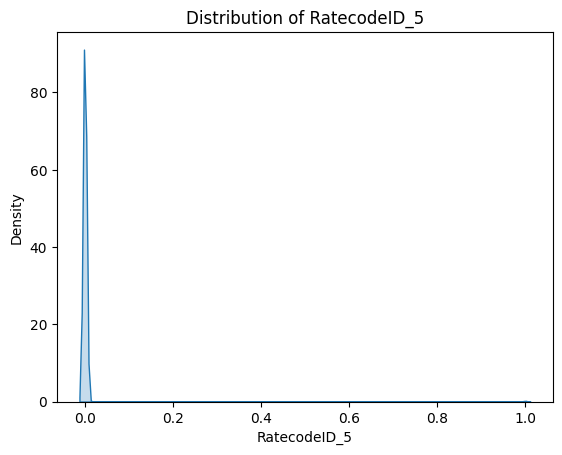

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


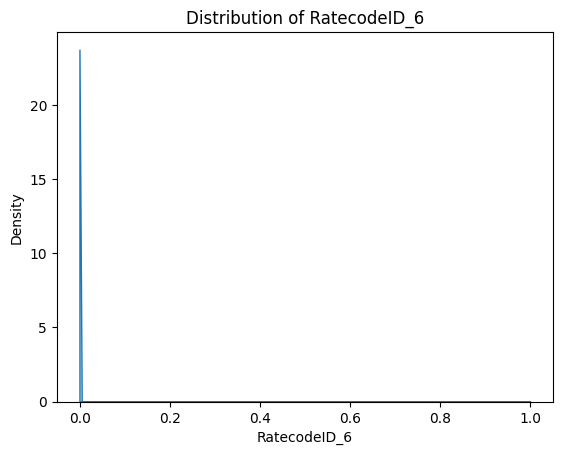

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


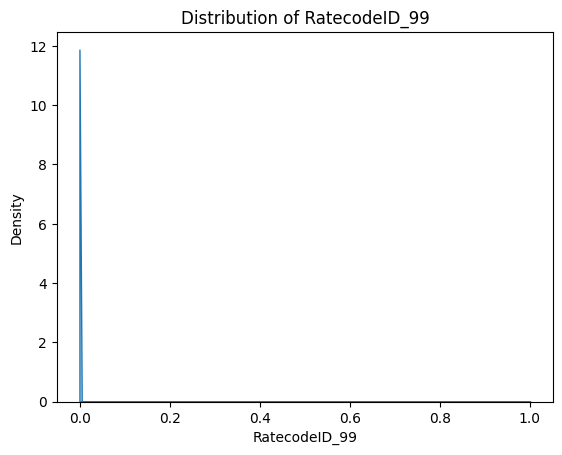

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


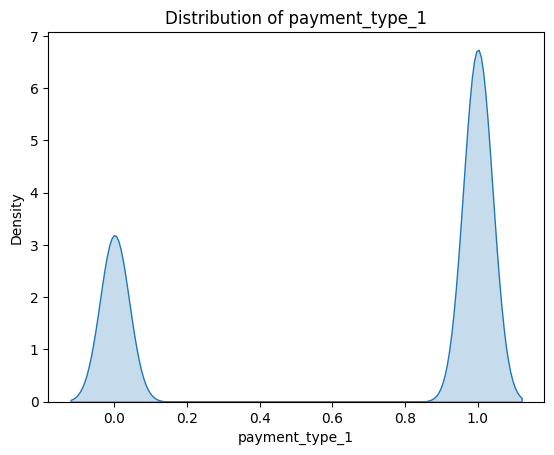

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


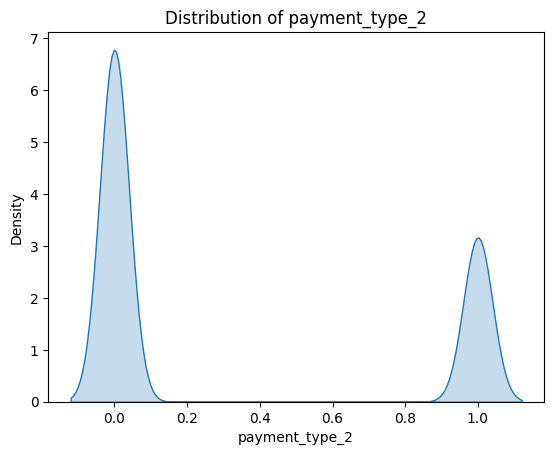

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


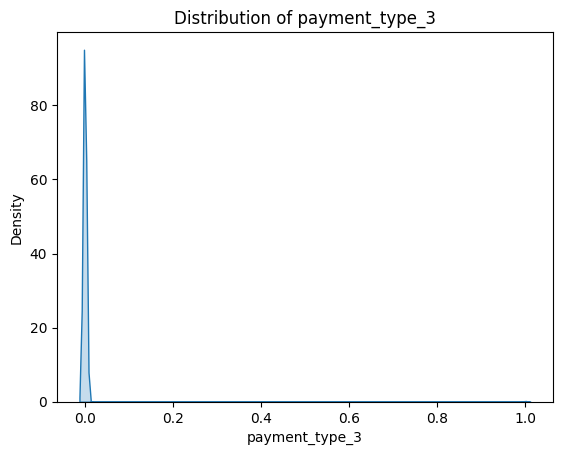

/tmp/ipython-input-3049188080.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[col], shade=True)


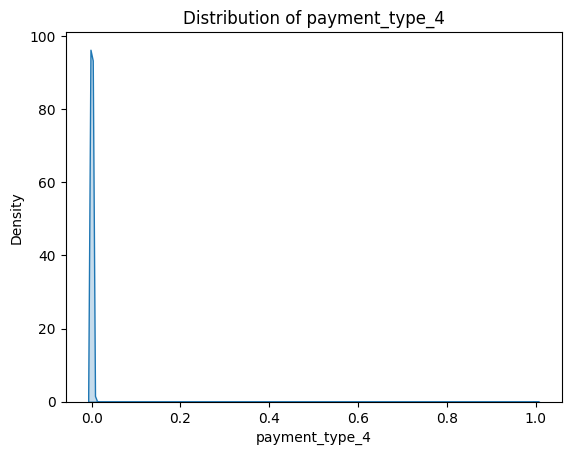

In [72]:
numerical_cols=data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.show()

**Skewness**

In [73]:
#  Calculate Skewness on numerical columns in data
numerical_cols= data.select_dtypes(include=['float64', 'int64']).columns

In [74]:
# Calculate skewness
skewness = data[numerical_cols].skew()
skewness

,0
VendorID,-0.916729
passenger_count,1.886940
total_amount,5.271134
trip_distance,19.776430
pickup_day,0.000000
am_pm,3.023795
is_night,-0.204878
trip_duration,11.860000
fare_per_mile,243.771954
fare_per_minute,79.597419


In [75]:
# Copy df to avoid modifying original data
data_processed = data.copy()

In [76]:
data_processed.columns

Index(['VendorID', 'passenger_count', 'total_amount', 'trip_distance',
       'pickup_day', 'am_pm', 'is_night', 'trip_duration', 'pickup_hour',
       'pickup_month', 'fare_per_mile', 'fare_per_minute', 'RatecodeID_1',
       'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5',
       'RatecodeID_6', 'RatecodeID_99', 'payment_type_1', 'payment_type_2',
       'payment_type_3', 'payment_type_4'],
      dtype='object')

In [77]:
for col in [ 'total_amount', 'trip_distance','trip_duration' ]:
   # Try log1p'
    log_transformed = np.log1p(data_processed[col])
    print(f"{col} skewness after log1p: {log_transformed.skew():.4f}")

total_amount skewness after log1p: 0.9279
trip_distance skewness after log1p: 3.5789
trip_duration skewness after log1p: 0.2970


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
data_processed.drop(['fare_per_mile','fare_per_minute'],axis = 1, inplace = True)

**Model building**


Feature selection

In [79]:
data_processed.to_csv("data_cleaned.csv",index=False)
df = pd.read_csv("data_cleaned.csv").sample(frac=0.357, random_state=42)  # sampling

In [80]:
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [81]:
val = df.drop("total_amount", axis= 1)
tar = df['total_amount']

In [82]:
print(val.dtypes)

VendorID             int64
passenger_count      int64
trip_distance      float64
pickup_day           int64
am_pm                int64
is_night             int64
trip_duration      float64
pickup_hour          int64
pickup_month         int64
RatecodeID_1       float64
RatecodeID_2       float64
RatecodeID_3       float64
RatecodeID_4       float64
RatecodeID_5       float64
RatecodeID_6       float64
RatecodeID_99      float64
payment_type_1     float64
payment_type_2     float64
payment_type_3     float64
payment_type_4     float64
dtype: object


In [83]:
# Fit model
fs = RandomForestRegressor(n_estimators=600, random_state=77, max_depth=3)
fs.fit(val, tar)

RandomForestRegressor(max_depth=3, n_estimators=600, random_state=77)

In [84]:
pd.DataFrame({
    "Col": val.columns,
    "Score": fs.feature_importances_ * 100
}).sort_values("Score", ascending = False)

,Col,Score
2,trip_distance,69.885626
6,trip_duration,16.572726
9,RatecodeID_1,12.208478
10,RatecodeID_2,1.219924
12,RatecodeID_4,0.046857
18,payment_type_3,0.031256
4,am_pm,0.020892
16,payment_type_1,0.010207
11,RatecodeID_3,0.004034
3,pickup_day,0.000000


In [85]:
selected = pd.DataFrame({
    "Col": val.columns,
    "Score": fs.feature_importances_ * 100
}).sort_values("Score", ascending = False).head(8)['Col'].to_list()

In [86]:
selected

['trip_distance',
 'trip_duration',
 'RatecodeID_1',
 'RatecodeID_2',
 'RatecodeID_4',
 'payment_type_3',
 'am_pm',
 'payment_type_1']

In [87]:
val = df[selected]
tar = df['total_amount']

In [88]:
val_train,val_test,tar_train,tar_test = train_test_split(val,tar,test_size=0.3,random_state=42)

In [89]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(val_train, tar_train)  # Train the model
    tar_pred = model.predict(val_train)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(tar_train, tar_pred)
    mse = mean_squared_error(tar_train, tar_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(tar_train, tar_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,6.687120,122.814837,11.082186,0.374926
Decision Tree Regressor,0.011457,0.434517,0.659179,0.997788
Random Forest Regressor,0.543585,5.288133,2.299594,0.973086
XGBoost Regressor,1.149087,7.436960,2.727079,0.962149
Lasso Regression,7.953231,172.432055,13.131339,0.122397
Ridge Regression,6.687439,122.815578,11.082219,0.374923


In [90]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(val_train, tar_train)  # Train the model
    tar_pred = model.predict(val_test)  # Predict on test data

    # Compute evaluation metrics
    mae = mean_absolute_error(tar_test, tar_pred)
    mse = mean_squared_error(tar_test, tar_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(tar_test, tar_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df

,MAE,MSE,RMSE,R2 Score
Linear Regression,6.685822,104.441573,10.219666,0.409246
Decision Tree Regressor,1.917667,121.798649,11.036243,0.311069
Random Forest Regressor,1.493876,53.330427,7.302768,0.698347
XGBoost Regressor,1.370063,21.916682,4.681526,0.876032
Lasso Regression,7.934251,153.190017,12.376995,0.133510
Ridge Regression,6.686245,104.452331,10.220192,0.409185


In [ ]:
# Best model is XGBoost Regressor model

**Cross validation**

In [91]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the model
xgb = XGBRegressor(n_estimators=100, random_state=42,)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(xgb, val, tar, cv=kf, scoring='r2')

# Print all 5 scores
print(f"All 5-Fold Scores: {cv_scores}")
print()
# Mean
print(f"Mean R2 Score: {np.mean(cv_scores):.4f}")

All 5-Fold Scores: [0.87730269 0.9258069  0.85608111 0.81659451 0.79647224]

Mean R2 Score: 0.8545


**Hyperparameter Tuning for XGBoost using RandomizedSearchCV**

In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
# Define model
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Define hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
}

In [94]:
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,              # number of parameter settings sampled
    scoring='r2',           # evaluation metric
    cv=5,                   # 5-fold cross-validation
    verbose=1,
    random_state=42,

)

In [95]:
# Fit on training data
random_search.fit(val, tar)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=100,
                                          n_jobs=None, num_parallel_tree=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [50, 100, 200, 300],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=1)

In [96]:
print("Best hyperparameters:", random_search.best_params_)
print("Best cross-validation R2 score:", random_search.best_score_)

Best hyperparameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best cross-validation R2 score: 0.8690917005981211



**Pickling the model and encoders**

In [97]:
# Saving Model
import pickle

best_model = random_search.best_estimator_

# Save the model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as best_model.pkl")

Model saved as best_model.pkl


In [98]:
# Saving Encoders
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

with open('ohe_encoder.pkl', 'wb') as file:
    pickle.dump(ohe, file)


print("Encoders saved successfully.")

Encoders saved successfully.


In [99]:
val.columns

Index(['trip_distance', 'trip_duration', 'RatecodeID_1', 'RatecodeID_2',
       'RatecodeID_4', 'payment_type_3', 'am_pm', 'payment_type_1'],
      dtype='object')